# Homework Week 3: Classification, Amalgamation, Confusion

Team: team-deep-thinkers

Submitted by: Miyar Karthik Kamath

Student ID: 017449133


### Dataset: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

The data contains information from the 1990 California census. The data was sourced from Kaggle.

**Columns**:

* longitude: A measure of how far west a house is; a higher value is farther west
* latitude: A measure of how far north a house is; a higher value is farther north
* housingMedianAge: Median age of a house within a block; a lower number is a newer building
* totalRooms: Total number of rooms within a block
* totalBedrooms: Total number of bedrooms within a block
* population: Total number of people residing within a block
* households: Total number of households, a group of people residing within a home unit, for a block
* medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
* medianHouseValue: Median house value for households within a block (measured in US Dollars)
* oceanProximity: Location of the house w.r.t ocean/sea

### Business Objective:

The primary business objective is to use machine learning to analyze a particular investment, help investors make data-driven decisions when purchasing investment properties, and analyze real estate prices by looking at affordability to maximize profitability and minimize risk.




### Importing Dependencies and Loading Dataset

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/ML-Fall-2024/team-deep-thinkers/data/housing.csv'
housing_data = pd.read_csv(file_path)

In [5]:
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Data Wrangling and Preparation

Clearing missing values, scaling data, and selecting relevant features for clustering.

Dropping NaN (Not a Number) values:

In [7]:
housing_data.dropna(inplace=True)

Checking non-null values:

In [8]:
housing_data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [9]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Checking for duplicate rows:

In [10]:
housing_data[housing_data.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


### Applying Classification

According to the U.S. Census Bureau, the median price of a home in California was $247,000, in 1990.

So, based on this, let us classify Median House values into the below classifications:

* Below Median: Homes with a median house value below $247,000.

* Above Median: Homes with a median house value of $247,000 and above

In [11]:
print(housing_data['median_house_value'].min())
print(housing_data['median_house_value'].max())


14999.0
500001.0


In [12]:
# Define the new bins and labels based on your categories
bins = [0, 247000, housing_data['median_house_value'].max() + 1]  # Ensure the max value is included
labels = ['Below Median', 'Above Median']

# Create price categories
housing_data['price_category'] = pd.cut(housing_data['median_house_value'], bins=bins, labels=labels, include_lowest=True)

# Check the distribution of the new categories
print(housing_data['price_category'].value_counts())

price_category
Below Median    14551
Above Median     5882
Name: count, dtype: int64


#### Feature Engineering

In [13]:
from sklearn.preprocessing import StandardScaler

# Select the numeric columns to scale
numeric_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
                'population', 'households', 'median_income']

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the numeric columns
housing_data[numeric_cols] = scaler.fit_transform(housing_data[numeric_cols])

Encoding Categorical Data (ocean_proximity):

In [14]:
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'], drop_first=True)

Splitting the Data to testing data and training data

In [15]:
from sklearn.model_selection import train_test_split

# Features and target
X = housing_data.drop(columns=['median_house_value', 'price_category'])  # Exclude the target and original house value
y = housing_data['price_category']  # Target variable

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Applying Classification Models

Using Random Forest Classifier:

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize and train the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate performance
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier:
              precision    recall  f1-score   support

Above Median       0.89      0.79      0.84      1200
Below Median       0.92      0.96      0.94      2887

    accuracy                           0.91      4087
   macro avg       0.90      0.88      0.89      4087
weighted avg       0.91      0.91      0.91      4087



Using K-Nearest Neighbors (KNN):

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_clf.predict(X_test)

# Evaluate performance
print("K-Nearest Neighbors Classifier:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Classifier:
              precision    recall  f1-score   support

Above Median       0.82      0.72      0.76      1200
Below Median       0.89      0.93      0.91      2887

    accuracy                           0.87      4087
   macro avg       0.85      0.83      0.84      4087
weighted avg       0.87      0.87      0.87      4087



Using Logistic Regression:

In [18]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_clf.predict(X_test)

# Evaluate performance
print("Logistic Regression Classifier:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classifier:
              precision    recall  f1-score   support

Above Median       0.81      0.70      0.75      1200
Below Median       0.88      0.93      0.91      2887

    accuracy                           0.86      4087
   macro avg       0.85      0.82      0.83      4087
weighted avg       0.86      0.86      0.86      4087



Based on the metrics like accuracy, precision, recall, and F1-score, we notice Random Forest is best performing model.

#### Confusion Matrix

Plotting the confusion matrix:

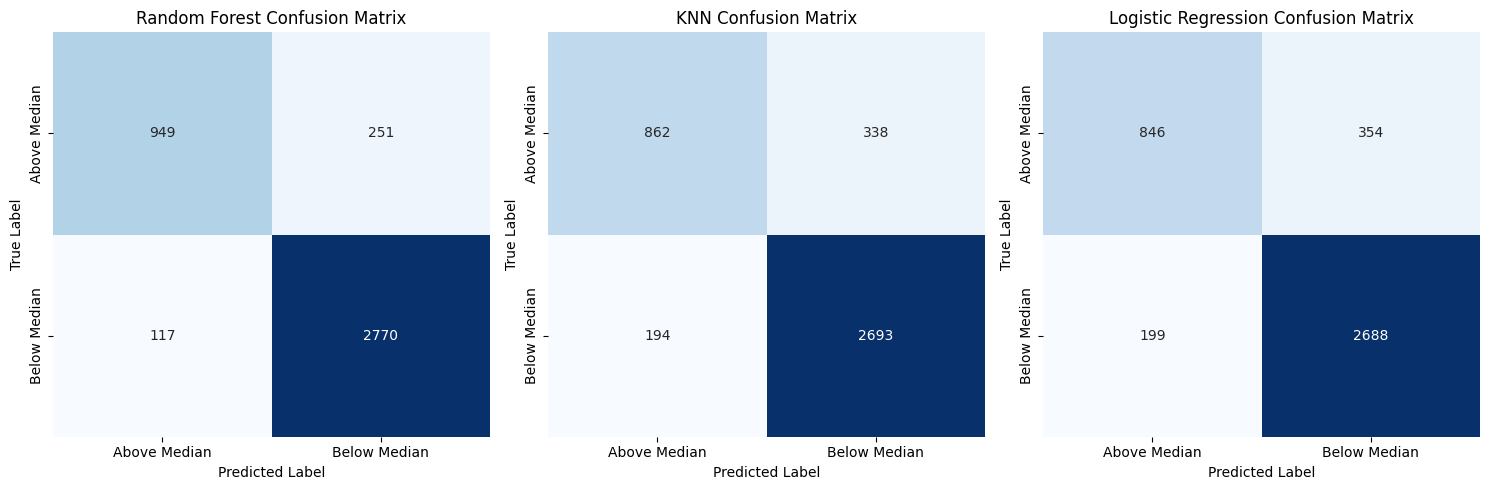

In [19]:
# Create confusion matrices
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=['Above Median', 'Below Median'])
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=['Above Median', 'Below Median'])
cm_logreg = confusion_matrix(y_test, y_pred_lr, labels=['Above Median', 'Below Median'])

# Plotting function
def plot_confusion_matrix(cm, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Above Median', 'Below Median'],
                yticklabels=['Above Median', 'Below Median'])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

# Plot confusion matrices
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plot_confusion_matrix(cm_rf, 'Random Forest Confusion Matrix')

plt.subplot(1, 3, 2)
plot_confusion_matrix(cm_knn, 'KNN Confusion Matrix')

plt.subplot(1, 3, 3)
plot_confusion_matrix(cm_logreg, 'Logistic Regression Confusion Matrix')

plt.tight_layout()
plt.show()

Based on the Confusion Matrix, we can deduce that Random Forest has the most accurate results.

**Performing additional evaluations to confirm our findings:**

Applying Receiver Operating Characteristic (ROC) Curve and calculating the Area Under the Curve (AUC) for Random Forest:

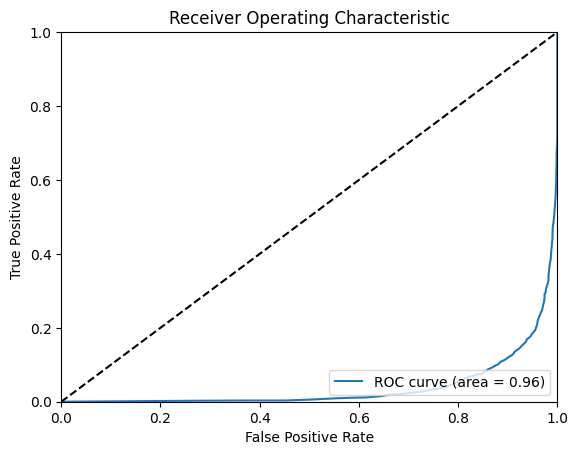

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# For Random Forest, for example:
y_scores_rf = rf_clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_scores_rf, pos_label='Above Median')
roc_auc = roc_auc_score(y_test, y_scores_rf)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Plotting Precision-Recall Curve to show the trade-off between precision (positive predictive value) and recall (sensitivity):

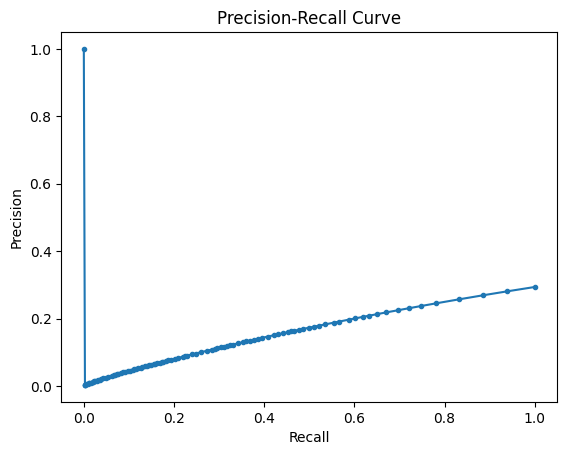

In [21]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_rf, pos_label='Above Median')

plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### Muller Loop

Running Muller Loop on dataset 1 (California Housing):

Categorizing based on the median value of median_house_value:

In [23]:
import pandas as pd

# Calculate the median value from your dataset
median_value = housing_data['median_house_value'].median()

# Create the price_category column based on the dataset median
housing_data['price_category'] = housing_data['median_house_value'].apply(
    lambda x: 'Above Median' if x > median_value else 'Below Median'
)

# Check the new column
print(housing_data[['median_house_value', 'price_category']].head())

   median_house_value price_category
0            452600.0   Above Median
1            358500.0   Above Median
2            352100.0   Above Median
3            341300.0   Above Median
4            342200.0   Above Median


Running Muller Loop on Random Forest Classifier:

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Prepare features and target
X = housing_data.drop(['price_category', 'median_house_value'], axis=1)
y = housing_data['price_category']

# Initialize a list to store results
results = []

# Define the datasets for the Muller Loop
datasets = [housing_data]  # Start with DS1

# Loop through each dataset
for i, data in enumerate(datasets):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the classifier
    clf = RandomForestClassifier(random_state=42)  # Change to your desired classifier

    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Evaluate performance
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        'Dataset': f'DS{i+1}',  # Naming convention
        'Accuracy': report['accuracy'],
        'Precision': report['Above Median']['precision'],  # Replace with your positive class
        'Recall': report['Above Median']['recall'],
        'F1 Score': report['Above Median']['f1-score']
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

  Dataset  Accuracy  Precision    Recall  F1 Score
0     DS1  0.898459   0.891378  0.905045   0.89816
